In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
customer_data = pd.read_csv('Customer.csv', header=0)

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [7]:
customer_data.shape

(200, 5)

In [8]:
customer_data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [9]:
customer_data.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [13]:
customer_data.rename(columns={'Annual Income (k$)':'AnnualIncome' , 'Spending Score (1-100)':'SpentScore'},inplace=True)


In [14]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpentScore'], dtype='object')

In [15]:
customer_data.describe()

,CustomerID,Age,AnnualIncome,SpentScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
print("Minimum spent money of customer is",customer_data['SpentScore'].min())

Minimum spent money of customer is 1


In [18]:
print("Maximum spent money of customer is",customer_data['SpentScore'].max())

Maximum spent money of customer is 99


In [19]:
customer_data.dtypes

CustomerID       int64
Gender          object
Age              int64
AnnualIncome     int64
SpentScore       int64
dtype: object

In [21]:
customer_data.isnull().sum()  #null values

CustomerID      0
Gender          0
Age             0
AnnualIncome    0
SpentScore      0
dtype: int64

In [22]:
customer_data.drop(["CustomerID"],axis=1,inplace=True)

In [23]:
customer_data.head(5)

,Gender,Age,AnnualIncome,SpentScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\rohan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rohan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rohan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

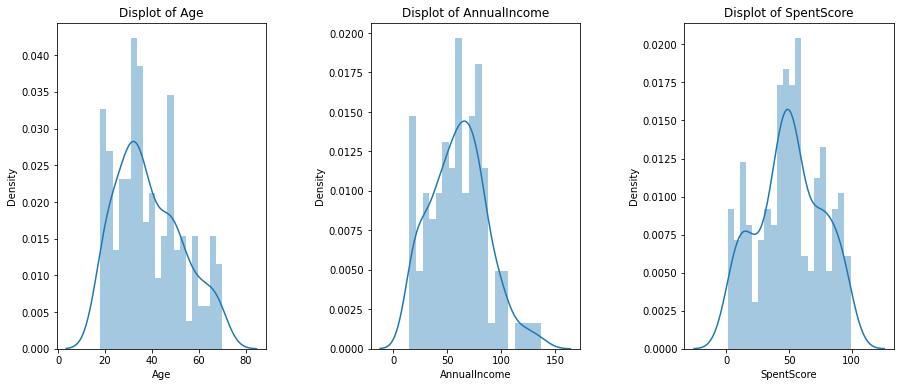

In [32]:
#Visualization of dataset
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age', 'AnnualIncome','SpentScore']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(customer_data[x], bins=20)
    plt.title('Displot of {}'.format(x))
plt.show()

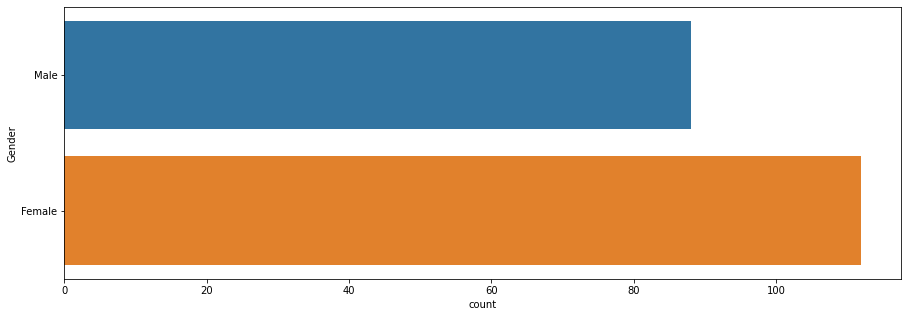

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=customer_data)
plt.show()

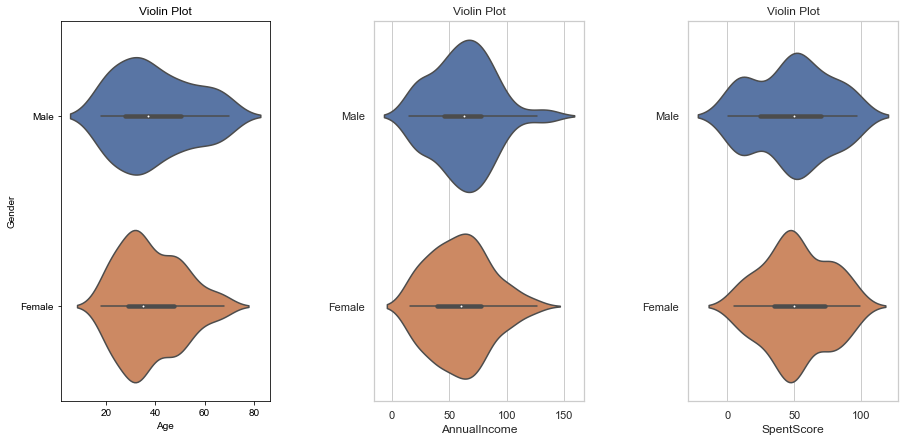

In [36]:
plt.figure(1, figsize=(15,7))
n=0
for cols in  ['Age', 'AnnualIncome','SpentScore']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.violinplot(x= cols, y='Gender' ,data=customer_data)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin Plot')
plt.show()

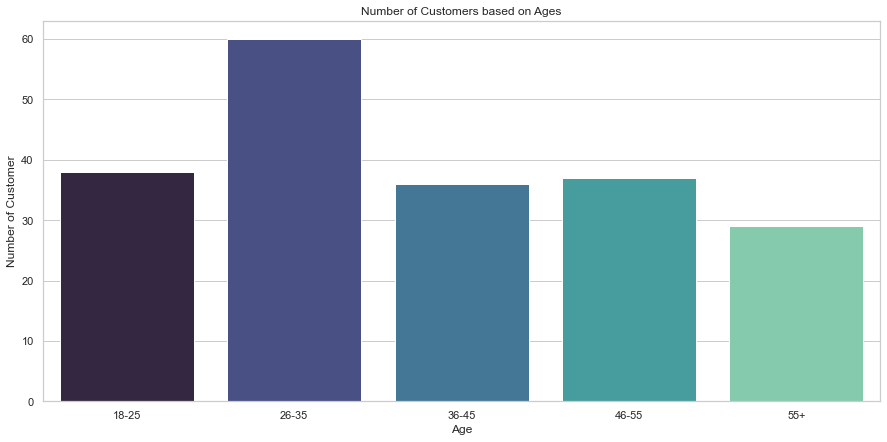

In [37]:
age_18_25 = customer_data.Age[(customer_data.Age >=18) & (customer_data.Age <=25)]
age_26_35 = customer_data.Age[(customer_data.Age >=26) & (customer_data.Age <=35)]
age_36_45 = customer_data.Age[(customer_data.Age >=36) & (customer_data.Age <=45)]
age_46_55 = customer_data.Age[(customer_data.Age >=46) & (customer_data.Age <=55)]
age_55above = customer_data.Age[customer_data.Age >=56]

age_x= ["18-25","26-35","36-45","46-55","55+"]
age_y= [len (age_18_25.values), len(age_26_35.values), len (age_36_45.values),len (age_46_55.values),len (age_55above.values)]
plt.figure(1, figsize=(15,7))
sns.barplot(x=age_x , y=age_y , palette="mako")
plt.title("Number of Customers based on Ages")
plt.xlabel ("Age")
plt.ylabel("Number of Customer")
plt.show()

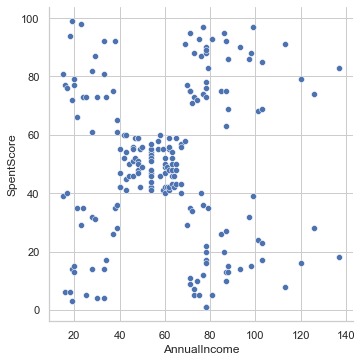

In [40]:
#Relationship Between Annual Income and Spending Score
sns.relplot(x="AnnualIncome" , y="SpentScore", data=customer_data)

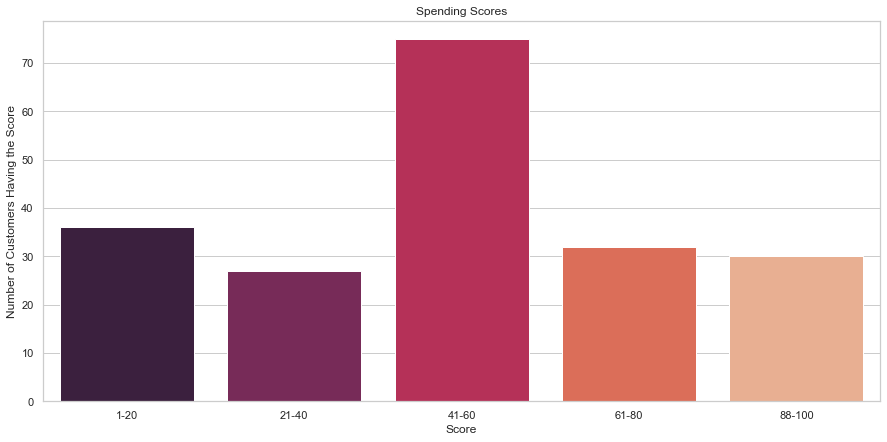

In [41]:
ss_1_20 = customer_data.SpentScore[(customer_data.SpentScore >=1) & (customer_data.SpentScore <=20)]
ss_21_40 = customer_data.SpentScore[(customer_data.SpentScore >=21) & (customer_data.SpentScore <=40)]
ss_41_60 = customer_data.SpentScore[(customer_data.SpentScore >=41) & (customer_data.SpentScore <=60)]
ss_61_80 = customer_data.SpentScore[(customer_data.SpentScore >=61) & (customer_data.SpentScore <=80)]
ss_81_100 = customer_data.SpentScore[(customer_data.SpentScore >=81) & (customer_data.SpentScore <=100)]
ss_x= ["1-20","21-40","41-60","61-80","88-100"]
ss_y= [len (ss_1_20.values), len(ss_21_40.values), len (ss_41_60.values),len (ss_61_80.values),len (ss_81_100.values)]
plt.figure(1, figsize=(15,7))
sns.barplot(x=ss_x , y=ss_y , palette="rocket")
plt.title("Spending Scores")
plt.xlabel ("Score")
plt.ylabel("Number of Customers Having the Score")
plt.show()

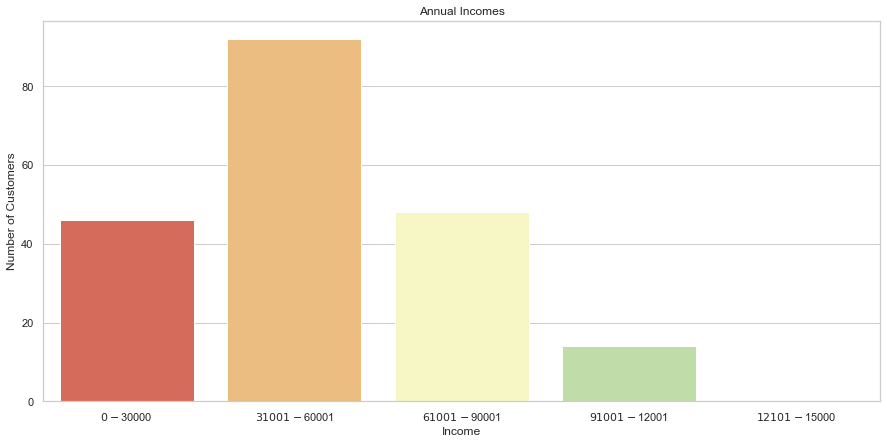

In [43]:
al0_30 =customer_data.AnnualIncome[(customer_data.SpentScore >= 0) & (customer_data.SpentScore <=30)]
al31_60 =customer_data.AnnualIncome[(customer_data.SpentScore >= 31) & (customer_data.SpentScore <=60)]
al61_90 =customer_data.AnnualIncome[(customer_data.SpentScore >= 61) & (customer_data.SpentScore <=90)]
al91_120 =customer_data.AnnualIncome[(customer_data.SpentScore >= 91) & (customer_data.SpentScore <=120)]
al121_150 =customer_data.AnnualIncome[(customer_data.SpentScore >= 121) & (customer_data.SpentScore <=150)]
al_x= ["$0- $30000","$31001- $60001","$61001-$90001","$91001-$12001","$12101-$15000"]
al_y= [len (al0_30.values), len(al31_60.values), len (al61_90.values),len (al91_120.values),len (al121_150.values)]
plt.figure(1, figsize=(15,7))
sns.barplot(x=al_x , y=al_y , palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel ("Income")
plt.ylabel("Number of Customers")
plt.show()

In [47]:
# Clustering our data 
# Step 1 -> to find number of clusters

X1 =customer_data.loc[:,["Age","SpentScore"]].values

from sklearn.cluster import KMeans


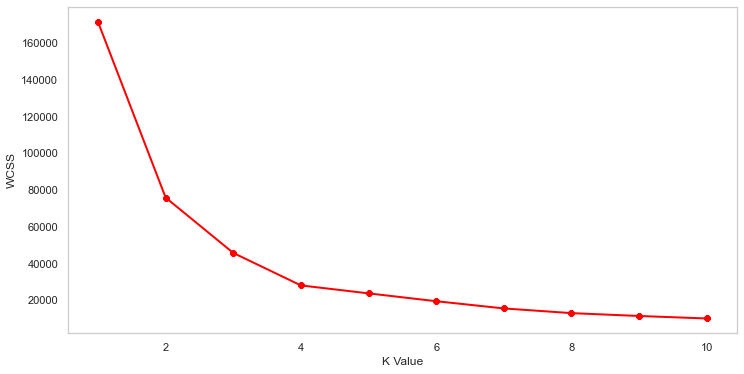

In [48]:
wcss=[]
for k in range(1,11):
    kmeans =KMeans(n_clusters =k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [49]:
# We considered our optimum cluster to be 4 as after that there is a dip

kmeans =KMeans(n_clusters =4)

label =kmeans.fit_predict(X1)
print(label)

[3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 3 3 1 2 3 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 3 2 0 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [51]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]]


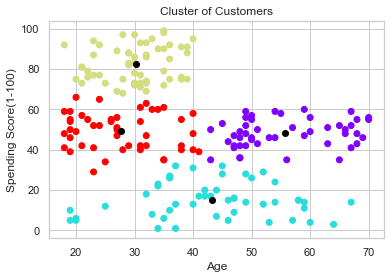

In [52]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_ , cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("Cluster of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score(1-100)")
plt.show()

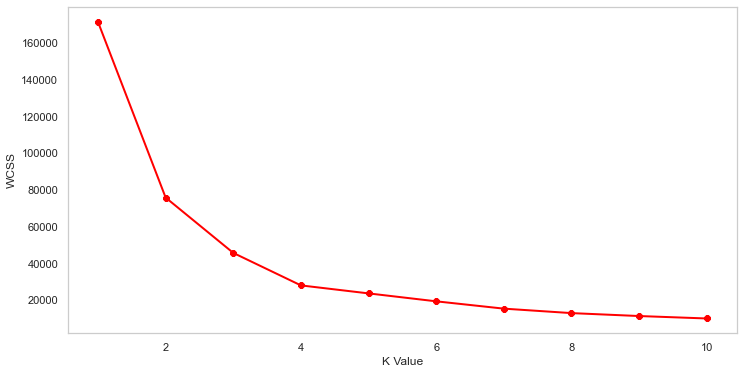

In [59]:
X2 =customer_data.loc[:,["AnnualIncome","SpentScore"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans =KMeans(n_clusters =k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [60]:
#let in this case clusters are 5
kmeans =KMeans(n_clusters =5)

label =kmeans.fit_predict(X2)
print(label)

[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 3 2 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 0 4 3 4 0 4 0 4 3 4 0 4 0 4 0 4 0 4 3 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]


In [61]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]]


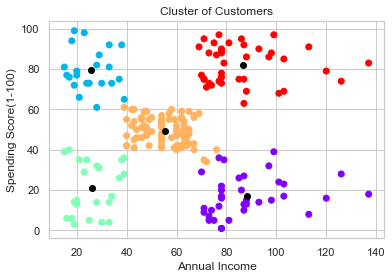

In [62]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_ , cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("Cluster of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score(1-100)")
plt.show()

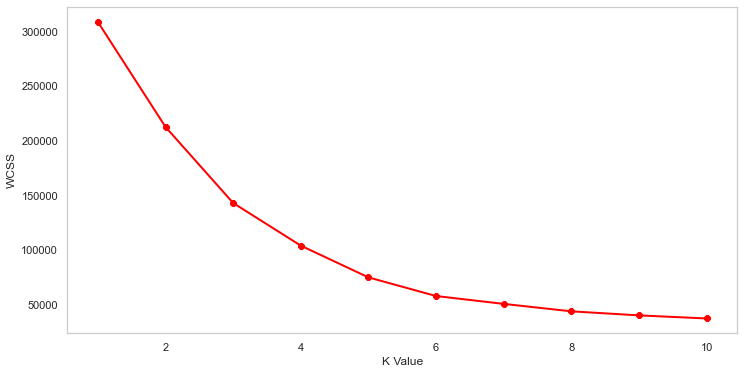

In [63]:
X3 =customer_data.iloc[:,1:]

wcss=[]
for k in range(1,11):
    kmeans =KMeans(n_clusters =k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [65]:
kmeans =KMeans(n_clusters =5)

label =kmeans.fit_predict(X3)
print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [66]:
print(kmeans.cluster_centers_)

[[25.52173913 26.30434783 78.56521739]
 [40.32432432 87.43243243 18.18918919]
 [32.69230769 86.53846154 82.12820513]
 [43.28205128 55.02564103 49.69230769]
 [45.2173913  26.30434783 20.91304348]]


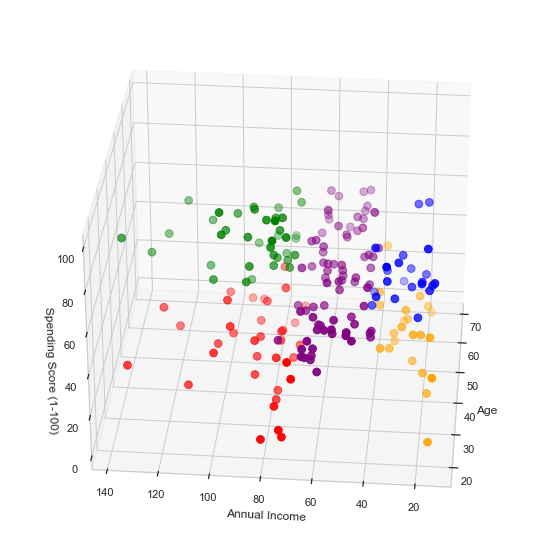

In [68]:
clusters =kmeans.fit_predict(X3)
customer_data["label"] =clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax =fig.add_subplot(111, projection ="3d")
ax.scatter(customer_data.Age[customer_data.label ==0], customer_data.AnnualIncome[customer_data.label ==0], customer_data.SpentScore[customer_data.label ==0], c="blue", s=60)
ax.scatter(customer_data.Age[customer_data.label ==1], customer_data.AnnualIncome[customer_data.label ==1], customer_data.SpentScore[customer_data.label ==1], c="red", s=60)
ax.scatter(customer_data.Age[customer_data.label ==2], customer_data.AnnualIncome[customer_data.label ==2], customer_data.SpentScore[customer_data.label ==2], c="green", s=60)
ax.scatter(customer_data.Age[customer_data.label ==3], customer_data.AnnualIncome[customer_data.label ==3], customer_data.SpentScore[customer_data.label ==3], c="orange", s=60)
ax.scatter(customer_data.Age[customer_data.label ==4], customer_data.AnnualIncome[customer_data.label ==4], customer_data.SpentScore[customer_data.label ==4], c="purple", s=60)
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income ")
ax.set_zlabel("Spending Score (1-100)")

plt.show()